# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [ ]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def demand(p):
    return 500 - 3.2*p
def supply(p,t):
    return -100 + 4.3*(p-t)

In [13]:
x,p,t = sp.symbols ('x, p, t', real= True, positive = True)
equ=sp.Eq(demand(p),supply(p,t))
equ
#betingelse for likevekt

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [14]:
p_eq=sp.solve(equ, p)
p_eq
#likevekt pris

[0.573333333333333*t + 80.0]

In [16]:
x_eq=supply(p_eq[0], t)
x_eq
#likevekt kvantum

244.0 - 1.83466666666667*t

In [17]:
p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

print(p_eq_fn(t))

x_eq_fn=sp.lambdify(
    (t),
    x_eq
)

print(x_eq_fn(t))

0.573333333333333*t + 80.0
244.0 - 1.83466666666667*t


In [18]:
p_eq_fn(0) #uten avgift

80.0

In [19]:
p_eq_fn(4) #med avgift

82.29333333333334

In [20]:
x_eq_fn(0)#uten avgift

244.0

In [21]:
x_eq_fn(4)#med avgift

236.66133333333332

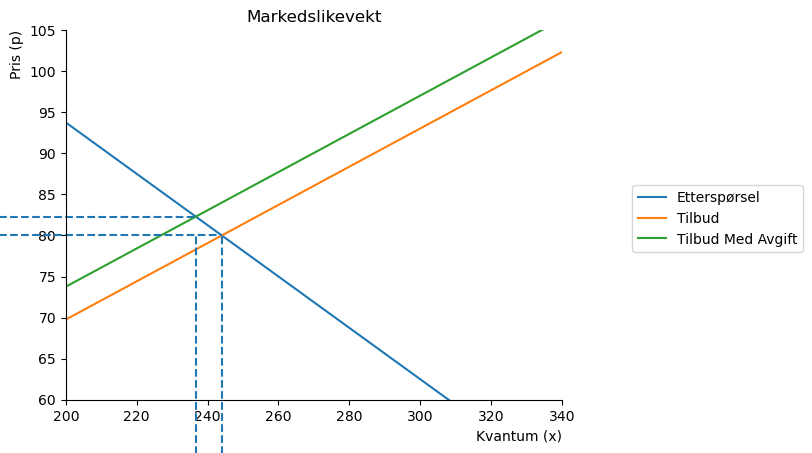

In [70]:
x_num=np.linspace(0.1,500,100)
q = np.linspace(0,100,3)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(200,340))
                ax.set(ylim=(60,105))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(demand(x_num), x_num, label='Etterspørsel')
ax.plot(supply(x_num,0),x_num, label='Tilbud')
ax.plot(supply(x_num, 4), x_num, label='Tilbud Med Avgift')

ax.vlines(x_eq_fn(0),0, p_eq_fn(0), linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(4),0, p_eq_fn(0), linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0),0,x_eq_fn(0), linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(4),0,237, linestyles='dashed', clip_on=False)
ax.legend(bbox_to_anchor=(1.6,0.6))

ax.legend(bbox_to_anchor=(1.5,0.6))

fig

ax.set_title('Markedslikevekt')

ax.legend(bbox_to_anchor=(1.5,0.6));

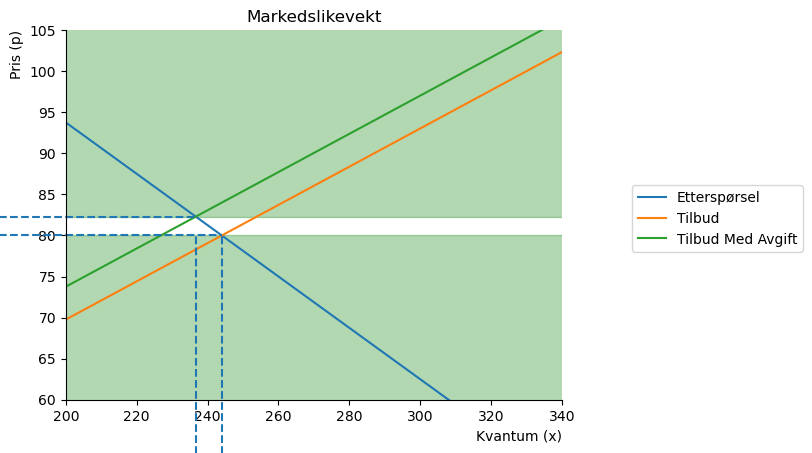

In [71]:
#ikke færdig, klarte ikke begrense innen rette rammer.
ax.fill_between(x_num, 82.3,demand(5), color = "green",alpha = 0.3)
ax.fill_between(x_num, 80,supply(5,0), color = "green",alpha = 0.3)

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [80]:
from IPython.display import Markdown

tbl=f"""

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |    | |  |
|Produsentpris  | |   |  |
|Kvantum  | {x_eq_fn(0) } | {x_eq_fn(4) } |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

"""
display(Markdown(tbl))



|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |    | |  |
|Produsentpris  | |   |  |
|Kvantum  | 244.0 | 236.66133333333332 |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

